In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/bigcontest/data/'

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_food_waste = pd.read_csv(path+'FOOD_WASTE.csv',encoding = 'euc-kr')
df_card_spending = pd.read_csv(path+'CARD_SPENDING.csv',encoding = 'euc-kr')


In [4]:
df_food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [5]:
df_food_waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211445 entries, 0 to 2211444
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   base_date   object
 1   city        object
 2   emd_cd      object
 3   emd_nm      object
 4   em_area_cd  object
 5   em_cnt      int64 
 6   em_g        int64 
 7   pay_amt     int64 
dtypes: int64(3), object(5)
memory usage: 135.0+ MB


In [6]:
df_food_waste['emd_cd'] = df_food_waste['emd_cd'].apply(pd.to_numeric, errors='coerce')

In [7]:
df_food_waste.dropna(axis=0, inplace=True)

In [8]:
df_food_waste['emd_cd'] = df_food_waste['emd_cd'].astype(int)

In [9]:
df_food_waste['base_date'] = pd.to_datetime(df_food_waste['base_date'])

In [10]:
df_food_waste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209691 entries, 0 to 2211444
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   base_date   datetime64[ns]
 1   city        object        
 2   emd_cd      int64         
 3   emd_nm      object        
 4   em_area_cd  object        
 5   em_cnt      int64         
 6   em_g        int64         
 7   pay_amt     int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 151.7+ MB


In [11]:
df_card_spending.head()

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674


In [12]:
df_card_spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   base_date   544805 non-null  object
 1   city        544805 non-null  object
 2   emd_cd      544805 non-null  object
 3   emd_nm      544805 non-null  object
 4   mct_cat_cd  544805 non-null  object
 5   mct_cat_nm  544805 non-null  object
 6   use_cnt     544805 non-null  int64 
 7   use_amt     544805 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 33.3+ MB


In [13]:
df_card_spending['emd_cd'] = df_card_spending['emd_cd'].apply(pd.to_numeric, errors='coerce')

In [14]:
df_card_spending.dropna(axis=0, inplace=True)

In [15]:
df_card_spending['emd_cd'] = df_card_spending['emd_cd'].astype(int)

In [16]:
df_card_spending['base_date'] = pd.to_datetime(df_card_spending['base_date'])

In [17]:
df_card_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530497 entries, 0 to 544729
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   base_date   530497 non-null  datetime64[ns]
 1   city        530497 non-null  object        
 2   emd_cd      530497 non-null  int64         
 3   emd_nm      530497 non-null  object        
 4   mct_cat_cd  530497 non-null  object        
 5   mct_cat_nm  530497 non-null  object        
 6   use_cnt     530497 non-null  int64         
 7   use_amt     530497 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 36.4+ MB


In [18]:
df_card_spending.head()

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674


In [19]:
df_m_food = df_food_waste.resample('M',on='base_date').sum()
df_m_food

,emd_cd,em_cnt,em_g,pay_amt
base_date,,,,
2018-01-31,2234635373860,923729,2410146150,71661996
2018-02-28,2018939887932,857571,2237663300,66617693
2018-03-31,2233129892757,963207,2451217550,72928625
2018-04-30,2153593589869,946849,2253441550,67048102
2018-05-31,2240192097631,1044433,2313361350,68840476
2018-06-30,2178300678531,1122578,2428531015,72271765
2018-07-31,2263296138845,1352842,2929977250,87145304
2018-08-31,2268158891914,1295260,2749834250,81777173
2018-09-30,2199350601037,1193026,2396079150,71199129


In [20]:
df_food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [21]:
df_group_food = df_food_waste.groupby(['emd_nm','base_date']).sum()

In [22]:
df_food_sum = df_food_waste.groupby(['emd_nm']).sum()
top_emd = df_food_sum.sort_values(by='em_g', ascending=False).index[:6]


In [23]:
top_emd

Index(['노형동', '이도2동', '연동', '일도2동', '아라동', '화북동'], dtype='object', name='emd_nm')

In [24]:
df_group_food

emd_cd  em_cnt     em_g  pay_amt
emd_nm base_date                                       
건입동    2018-01-01  1453207110     668  1708250    51079
       2018-01-02  1453207110     745  1841150    55047
       2018-01-03  1453207110     563  1411450    42203
       2018-01-04  1453207110     652  1558700    46606
       2018-01-05  1453207110     595  1338350    39996
...                       ...     ...      ...      ...
효돈동    2021-06-26   601566600     281   853350    25524
       2021-06-27   551436050     328   992150    29681
       2021-06-28   601566600     294   956900    28632
       2021-06-29   601566600     280   900500    26949
       2021-06-30   601566600     313  1011050    30253

[49609 rows x 4 columns]

In [25]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='M', level=-1)]).sum())
df_mg_food = using_Grouper(df_group_food)
df_mg_food.drop(['emd_cd'],axis=1,inplace=True)
df_mg_food

em_cnt      em_g  pay_amt
emd_nm base_date                            
건입동    2018-01-31   18416  45646550  1364804
       2018-02-28   17491  42953550  1284216
       2018-03-31   19396  46422450  1387853
       2018-04-30   19179  42438700  1268331
       2018-05-31   21277  44893300  1341494
...                   ...       ...      ...
효돈동    2021-02-28    6795  26128400   782163
       2021-03-31    7492  26845400   803505
       2021-04-30    7399  25200200   754194
       2021-05-31    6682  21724850   650080
       2021-06-30    8720  27554100   824457

[1634 rows x 3 columns]

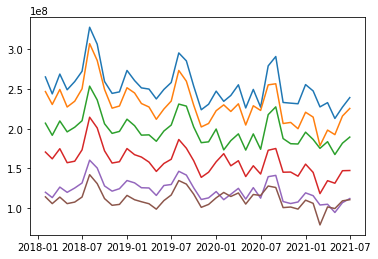

In [26]:
for i in top_emd:
  plt.plot(df_mg_food.loc[i]['em_g'])

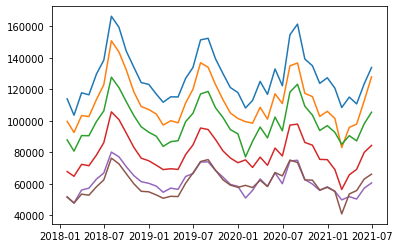

In [27]:
for i in top_emd:
  plt.plot(df_mg_food.loc[i]['em_cnt'])

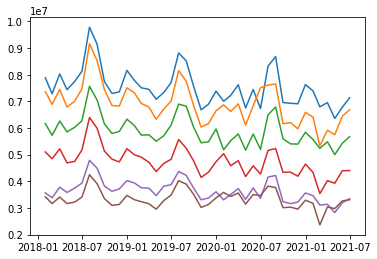

In [28]:
for i in top_emd:
  plt.plot(df_mg_food.loc[i]['pay_amt'])

In [29]:
corr_mg = df_mg_food.corr().apply(lambda x: round(x,3))


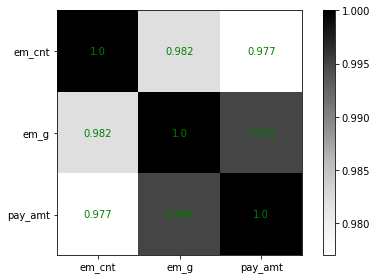

In [30]:
fig, ax = plt.subplots()
im = ax.imshow(corr_mg, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_mg.columns)))
ax.set_yticks(np.arange(len(corr_mg.index)))

ax.set_xticklabels(corr_mg.columns)
ax.set_yticklabels(corr_mg.columns)

for x in range(len(corr_mg.columns)):
    for y in range(len(corr_mg.index)):
        ax.text(y, x, corr_mg.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

In [31]:
df_card_spending.head()

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674


In [32]:
df_group_card = df_card_spending.groupby(['emd_nm','base_date']).sum()

In [33]:
df_group_card.drop(['emd_cd'],axis=1,inplace=True)
df_group_card

use_cnt    use_amt
emd_nm base_date                     
건입동    2018-01-01     1806   61606900
       2018-01-02     1806   66491024
       2018-01-03     1896   69478513
       2018-01-04     1758   53100276
       2018-01-05     1828  109730840
...                    ...        ...
효돈동    2021-06-26      975   52812687
       2021-06-27      929   34271453
       2021-06-28      804   28229166
       2021-06-29      919   33963316
       2021-06-30      714   31043903

[54911 rows x 2 columns]

In [34]:
df_mg_card = using_Grouper(df_group_card)

In [35]:
df_mg_card

use_cnt     use_amt
emd_nm base_date                      
건입동    2018-01-31    57683  2024688672
       2018-02-28    49921  2007405800
       2018-03-31    60518  2039051790
       2018-04-30    63252  2223501796
       2018-05-31    67433  2312530593
...                    ...         ...
효돈동    2021-02-28    22518   871237444
       2021-03-31    26236   925934742
       2021-04-30    25705   968343722
       2021-05-31    25243   897304608
       2021-06-30    24585   864786389

[1806 rows x 2 columns]

In [36]:
corr_mg = df_mg_card.corr().apply(lambda x: round(x,3))


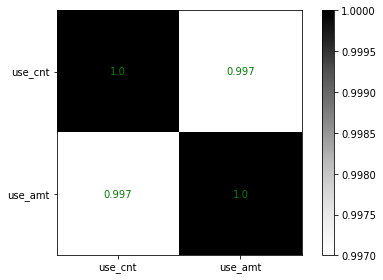

In [37]:
fig, ax = plt.subplots()
im = ax.imshow(corr_mg, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_mg.columns)))
ax.set_yticks(np.arange(len(corr_mg.index)))

ax.set_xticklabels(corr_mg.columns)
ax.set_yticklabels(corr_mg.columns)

for x in range(len(corr_mg.columns)):
    for y in range(len(corr_mg.index)):
        ax.text(y, x, corr_mg.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

In [38]:
df_mg = pd.concat([df_mg_card, df_mg_food],axis=1)

In [39]:
corr_mg = df_mg.corr().apply(lambda x: round(x,3))


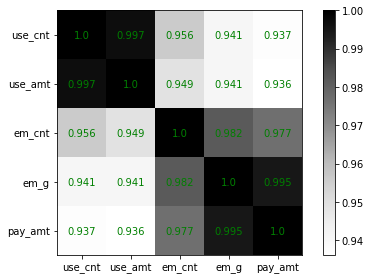

In [40]:
fig, ax = plt.subplots()
im = ax.imshow(corr_mg, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_mg.columns)))
ax.set_yticks(np.arange(len(corr_mg.index)))

ax.set_xticklabels(corr_mg.columns)
ax.set_yticklabels(corr_mg.columns)

for x in range(len(corr_mg.columns)):
    for y in range(len(corr_mg.index)):
        ax.text(y, x, corr_mg.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

In [41]:
df_mg

use_cnt     use_amt   em_cnt        em_g    pay_amt
emd_nm base_date                                                      
건입동    2018-01-31    57683  2024688672  18416.0  45646550.0  1364804.0
       2018-02-28    49921  2007405800  17491.0  42953550.0  1284216.0
       2018-03-31    60518  2039051790  19396.0  46422450.0  1387853.0
       2018-04-30    63252  2223501796  19179.0  42438700.0  1268331.0
       2018-05-31    67433  2312530593  21277.0  44893300.0  1341494.0
...                    ...         ...      ...         ...        ...
효돈동    2021-02-28    22518   871237444   6795.0  26128400.0   782163.0
       2021-03-31    26236   925934742   7492.0  26845400.0   803505.0
       2021-04-30    25705   968343722   7399.0  25200200.0   754194.0
       2021-05-31    25243   897304608   6682.0  21724850.0   650080.0
       2021-06-30    24585   864786389   8720.0  27554100.0   824457.0

[1806 rows x 5 columns]

# 인구

In [42]:
df_resident = pd.read_csv(path+'RESIDENT_POP.csv',encoding = 'euc-kr')
df_s_foreign = pd.read_csv(path+'SHORT_TERM_FRGN.csv',encoding = 'euc-kr')
df_l_foreign = pd.read_csv(path+'LONG_TERM_FRGN.csv',encoding = 'euc-kr')
df_korean = pd.read_csv(path+'KOREAN.csv',encoding = 'euc-kr')

In [43]:
df_resident['base_date'] = pd.to_datetime(df_resident['base_month']+df_resident['base_year']*100, format='%Y%m')
df_s_foreign['base_date'] = pd.to_datetime(df_s_foreign['base_date'])
df_l_foreign['base_date'] = pd.to_datetime(df_l_foreign['base_date'])
df_korean['base_date'] = pd.to_datetime(df_korean['base_date'])
map_sex = {'남성':0,'여성':1}
df_korean[['sex']] = df_korean[['sex']].applymap(map_sex.get)

In [44]:
df_korean.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,1,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,1,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,1,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,1,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,1,20,609.7710,5.9490,148.7246,제주


In [45]:
df_resident.head()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_date
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231,2018-01-01
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797,2018-01-01
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333,2018-01-01
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793,2018-01-01
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234,2018-01-01


In [46]:
df_resident.drop(['base_year','base_month'],axis=1, inplace=True)

In [47]:
df_group_res = df_resident.groupby(['emd_nm','base_date']).sum()

In [48]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='M', level=-1)]).sum())
df_mg_res = using_Grouper(df_group_res)
df_mg_res.drop(['emd_cd'],axis=1,inplace=True)
df_mg_res

resid_reg_pop  foreign_pop  total_pop
emd_nm base_date                                        
건입동    2018-01-31           9800          228      10028
       2018-02-28           9814          224      10038
       2018-03-31           9783          222      10005
       2018-04-30           9788          229      10017
       2018-05-31           9800          238      10038
...                          ...          ...        ...
효돈동    2021-02-28           5289           65       5354
       2021-03-31           5262           61       5323
       2021-04-30           5267           59       5326
       2021-05-31           5266           60       5326
       2021-06-30           5257           57       5314

[1806 rows x 3 columns]

In [49]:
df_mg = pd.concat([df_mg, df_mg_res],axis=1)
df_mg

use_cnt     use_amt  ...  foreign_pop  total_pop
emd_nm base_date                        ...                        
건입동    2018-01-31    57683  2024688672  ...          228      10028
       2018-02-28    49921  2007405800  ...          224      10038
       2018-03-31    60518  2039051790  ...          222      10005
       2018-04-30    63252  2223501796  ...          229      10017
       2018-05-31    67433  2312530593  ...          238      10038
...                    ...         ...  ...          ...        ...
효돈동    2021-02-28    22518   871237444  ...           65       5354
       2021-03-31    26236   925934742  ...           61       5323
       2021-04-30    25705   968343722  ...           59       5326
       2021-05-31    25243   897304608  ...           60       5326
       2021-06-30    24585   864786389  ...           57       5314

[1806 rows x 8 columns]

In [50]:
df_l_foreign

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0000,0.0000,3.3558,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0000,0.0000,12.2655,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.0624,0.0000,0.0000,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0000,0.0000,26.4749,그외


In [51]:
df_group_lf = df_l_foreign.groupby(['emd_nm','base_date','time']).sum()

In [52]:
#df_group_lf.drop(['emd_cd'],axis=1,inplace=True)
df_group_lf

emd_cd  resd_pop_cnt  work_pop_cnt  visit_pop_cnt
emd_nm base_date  time                                                      
건입동    2018-01-01 1     701548260      194.4027       30.5056       156.1608
                  2     701548260      196.6941       22.6345       148.8606
                  3     701548260      183.3233       22.6345       151.8221
                  4     701548260      188.7795       13.3501       147.8880
                  5     701548260      188.8245        7.8735       147.3685
...                           ...           ...           ...            ...
효돈동    2021-06-30 20    601566600       47.1162        5.2404        47.4853
                  21    451174950       41.8758        5.2404        30.2029
                  22    451174950       40.3908        5.2404        25.3556
                  23    501305500       40.3908        0.0000        29.8181
                  24    501305500       52.6508        0.0000        20.0184

[1317787 rows x 4 columns]

In [53]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='M', level=-2)]).sum()/24)
df_mg_lf = using_Grouper(df_group_lf)
df_mg_lf.drop(['emd_cd'],axis=1,inplace=True)
df_mg_lf

resd_pop_cnt  work_pop_cnt  visit_pop_cnt
emd_nm base_date                                            
건입동    2018-01-31   4241.851783    705.995213    4802.786437
       2018-02-28   3470.717708    551.756017    4042.264892
       2018-03-31   3956.070058    748.370221    4513.547042
       2018-04-30   3589.351950    617.694671    6095.972187
       2018-05-31   4253.649729    670.983267    4966.860958
...                         ...           ...            ...
효돈동    2021-02-28   1693.719117     76.762975     867.948538
       2021-03-31   1431.671287    108.202871     887.284692
       2021-04-30   1427.943042     93.091421     883.402142
       2021-05-31   1152.689925     67.024575    1254.002258
       2021-06-30   1397.138113     81.920650     890.858300

[1806 rows x 3 columns]

In [54]:
df_mg = pd.concat([df_mg_food,df_mg_card, df_mg_res,df_mg_lf],axis=1)
df_mg

em_cnt        em_g  ...  work_pop_cnt  visit_pop_cnt
emd_nm base_date                        ...                             
건입동    2018-01-31  18416.0  45646550.0  ...    705.995213    4802.786437
       2018-02-28  17491.0  42953550.0  ...    551.756017    4042.264892
       2018-03-31  19396.0  46422450.0  ...    748.370221    4513.547042
       2018-04-30  19179.0  42438700.0  ...    617.694671    6095.972187
       2018-05-31  21277.0  44893300.0  ...    670.983267    4966.860958
...                    ...         ...  ...           ...            ...
효돈동    2021-02-28   6795.0  26128400.0  ...     76.762975     867.948538
       2021-03-31   7492.0  26845400.0  ...    108.202871     887.284692
       2021-04-30   7399.0  25200200.0  ...     93.091421     883.402142
       2021-05-31   6682.0  21724850.0  ...     67.024575    1254.002258
       2021-06-30   8720.0  27554100.0  ...     81.920650     890.858300

[1806 rows x 11 columns]

In [55]:
df_group_sf = df_s_foreign.groupby(['emd_nm','base_date','time']).sum()

In [56]:
#df_group_lf.drop(['emd_cd'],axis=1,inplace=True)
df_group_sf

emd_cd  visit_pop_cnt
emd_nm base_date  time                          
건입동    2018-01-01 1     400884720       215.3073
                  2     400884720       216.5271
                  3     400884720       236.7032
                  4     400884720       234.7976
                  5     400884720       234.7976
...                           ...            ...
효돈동    2021-06-22 19     50130550         0.9238
                  20     50130550         0.9238
       2021-06-29 1      50130550         0.9212
                  11     50130550         0.9212
       2021-06-30 24     50130550         0.9212

[1247944 rows x 2 columns]

In [57]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='M', level=-2)]).sum()/24)
df_mg_sf = using_Grouper(df_group_sf)
df_mg_sf.drop(['emd_cd'],axis=1,inplace=True)
df_mg_sf.rename(columns={'visit_pop_cnt':'visit_pop_cnt_s'},inplace=True)
df_mg_sf

visit_pop_cnt_s
emd_nm base_date                  
건입동    2018-01-31      3259.294983
       2018-02-28      3489.270396
       2018-03-31      4677.452267
       2018-04-30      6332.157233
       2018-05-31      6201.046733
...                            ...
효돈동    2021-02-28         3.389325
       2021-03-31         8.879287
       2021-04-30         8.076117
       2021-05-31        15.498625
       2021-06-30         8.531258

[1806 rows x 1 columns]

In [58]:
df_mg = pd.concat([df_mg_food,df_mg_card, df_mg_res,df_mg_lf,df_mg_sf],axis=1)
df_mg

em_cnt        em_g  ...  visit_pop_cnt  visit_pop_cnt_s
emd_nm base_date                        ...                                
건입동    2018-01-31  18416.0  45646550.0  ...    4802.786437      3259.294983
       2018-02-28  17491.0  42953550.0  ...    4042.264892      3489.270396
       2018-03-31  19396.0  46422450.0  ...    4513.547042      4677.452267
       2018-04-30  19179.0  42438700.0  ...    6095.972187      6332.157233
       2018-05-31  21277.0  44893300.0  ...    4966.860958      6201.046733
...                    ...         ...  ...            ...              ...
효돈동    2021-02-28   6795.0  26128400.0  ...     867.948538         3.389325
       2021-03-31   7492.0  26845400.0  ...     887.284692         8.879287
       2021-04-30   7399.0  25200200.0  ...     883.402142         8.076117
       2021-05-31   6682.0  21724850.0  ...    1254.002258        15.498625
       2021-06-30   8720.0  27554100.0  ...     890.858300         8.531258

[1806 rows x 12 columns]

In [59]:
df_mg.to_csv(path+'monthly_group.csv')

In [60]:
corr_mg = df_mg.corr().apply(lambda x: round(x,3))


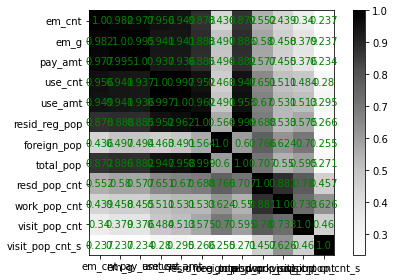

In [61]:
fig, ax = plt.subplots()
im = ax.imshow(corr_mg, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_mg.columns)))
ax.set_yticks(np.arange(len(corr_mg.index)))

ax.set_xticklabels(corr_mg.columns)
ax.set_yticklabels(corr_mg.columns)

for x in range(len(corr_mg.columns)):
    for y in range(len(corr_mg.index)):
        ax.text(y, x, corr_mg.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()  

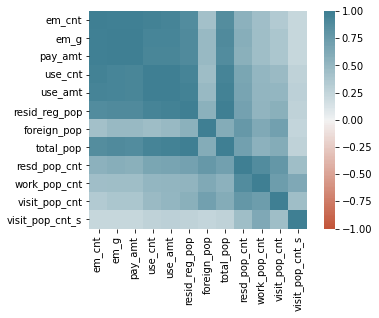

In [62]:
ax = sns.heatmap(
    corr_mg, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [63]:
considered = ['em_cnt','em_g','pay_amt','use_cnt','resid_reg_pop','total_pop']
features = df_mg[considered]

In [64]:
TRAIN_SPLIT = 0.8

In [65]:
dataset = features.values

data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std
print(dataset)

TypeError: ignored

In [ ]:
sadd=asdsdddfwk
sads
sds

In [ ]:
df_korean

In [ ]:
df_group_kor = df_korean.groupby(['emd_nm','base_date','age']).sum()

In [ ]:
#df_group_lf.drop(['emd_cd'],axis=1,inplace=True)
df_group_sf

In [ ]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='M', level=-2)]).sum()/24)
df_mg_sf = using_Grouper(df_group_sf)
df_mg_sf.drop(['emd_cd'],axis=1,inplace=True)
df_mg_sf.rename(columns={'visit_pop_cnt':'visit_pop_cnt_s'},inplace=True)
df_mg_sf

In [ ]:
df_mg = pd.concat([df_mg_food,df_mg_card, df_mg_res,df_mg_lf,df_mg_sf],axis=1)
df_mg